<a href="https://colab.research.google.com/github/wlrjs1300-coder/AI_26/blob/main/04_02_%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 마켓에 럭키백 성공으로 인해서 각각의 지역에서 수산물을 제공하기로 하였다.

# 영업팀은 매주 7개의 생선 중 일부를 무작위로 골라
# 머신러닝 모델을 학습할 수 있게 훈련데이터를 제공하고 있다.
# 하지만, 수산물을 제공한다는 곳이 너무 많아
# 샘플을 골라내는 일이 너무 힘들다. 추가되는 수산물의 샘플도 없다.

# 영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공해야 한다.

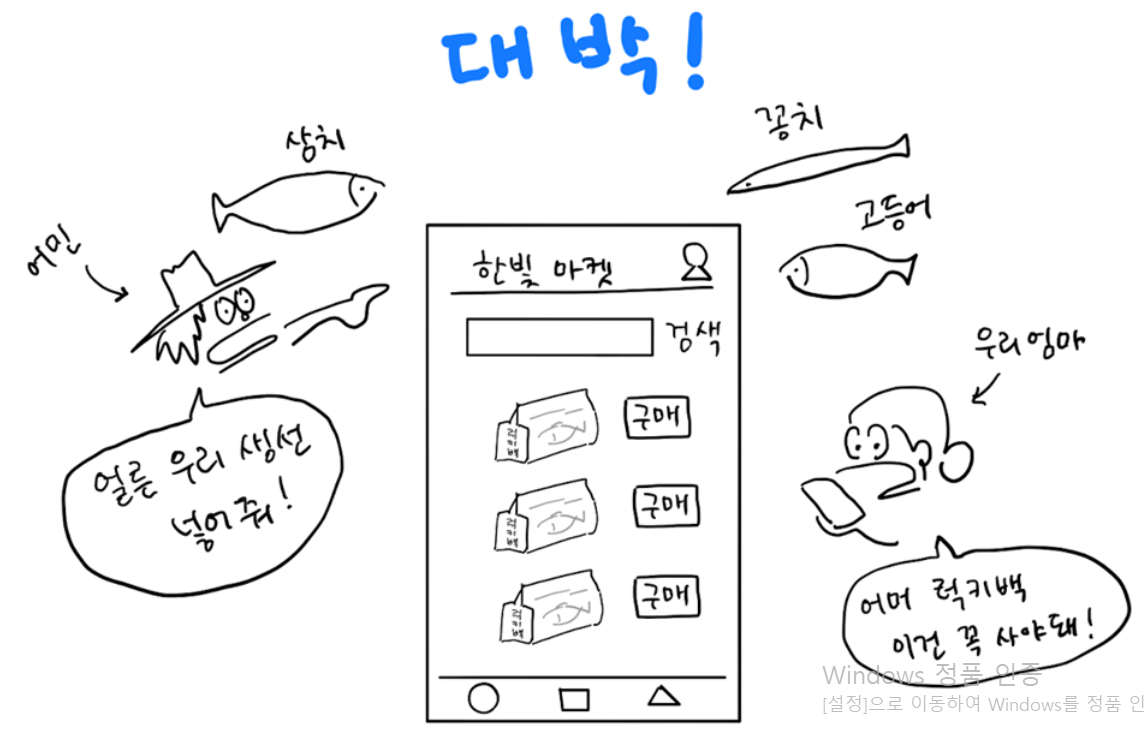

In [ ]:
# 점진적 학습

# 당면한 문제 : 훈련데이터가 한번에 준비되는 것이 아니라, 조금씩 전달됨

# 해결법 1 : 기존의 훈련데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련하기
#  단점 : 시간이 지날수록 데이터가 늘어남에 따라 -> 인력추가, 서버증설, 시간적 여유가 줄어든다 -> 지속성 낮아보임

# 해결법 2 : 새로운 데이터를 추가할 때마다 이전 데이터를 버림 (훈련데이터 크기를 일정하게 유지하는 방법)
#  단점 : 데이터를 버릴 때 다른 데이터에 없는 중요한 데이터가 포함되어 있을 수 있음

# 해결법 3 : 점진적 학습 방법 (온라인 학습, 훈련한 모델을 버리지 않고 조금씩 더 새로운 데이터를 학습) -> 확률적 경사 하강법

In [ ]:
# 확률적 경사 하강법 (실제 산에서 내려오는 것처럼 가파른 길을 찾아 천천히 조금씩 내려옴)
# 확률적 : 무작위, 랜덤 (훈련세트에서 랜덤하게 하나의 샘플을 고름)
# 경사 : 기울기
# 하강 : 내려가는
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려감

# 위 방법을 반복수행
# 만약 모든 샘플을 다 사용해도 내려오지 못할 경우 -> 처음부터 다시 시작 -> 훈련세트에 모든 샘플을 다시 채워 넣음 -> 다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사 내려감 -> 만족할만한 위치가 도달할 때까지 내려감

# 에포크(epoch) : 훈련세트를 한번 모두 사용하는 과정
# 일반적으로 경사하강법 중 수십 or 수백번 이상의 에포크(epoch)를 수행함

# 만약, 실제로 등산이라고 가정하고 산에서 내려온다고 생각했을 때, 집으로 돌아가려면 등산로의 입구까지 내려가야한다.
# 어떤 산길도 척척 내려갈 수 있는 초능력이 있다면 가장 빠른 길을 선택할 것이 분명한다.
# 가장 빠른 길은 경사가 가장 가파른 길!

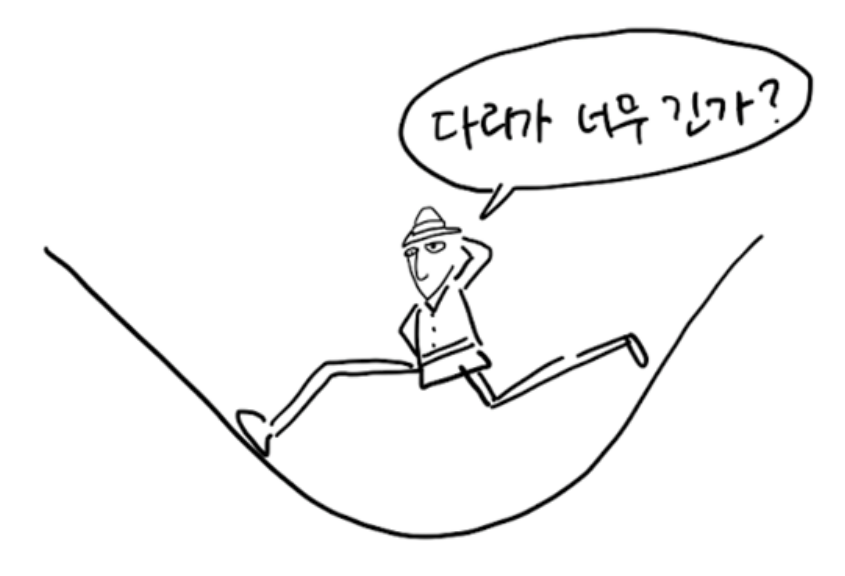

In [ ]:
# 실제로 산에서 내려올 때는 천천히 조금씩 내려와야 한다 -> 경사 하강법
# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다 -> 훈련법
# 훈련세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 길을 찾을 것이다.
# 그런데 전체 샘플을 사용하지 않고 훈련세트에서 랜덤하게 고른 딱 하나의 샘플을 골라 가장 가파른 길을 찾는 것 -> 확률적

# 결론 : 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려감
#        -> 다음 훈련세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 조금 내려감 -> 전체 샘플을 모두 사용할 때까지 진행

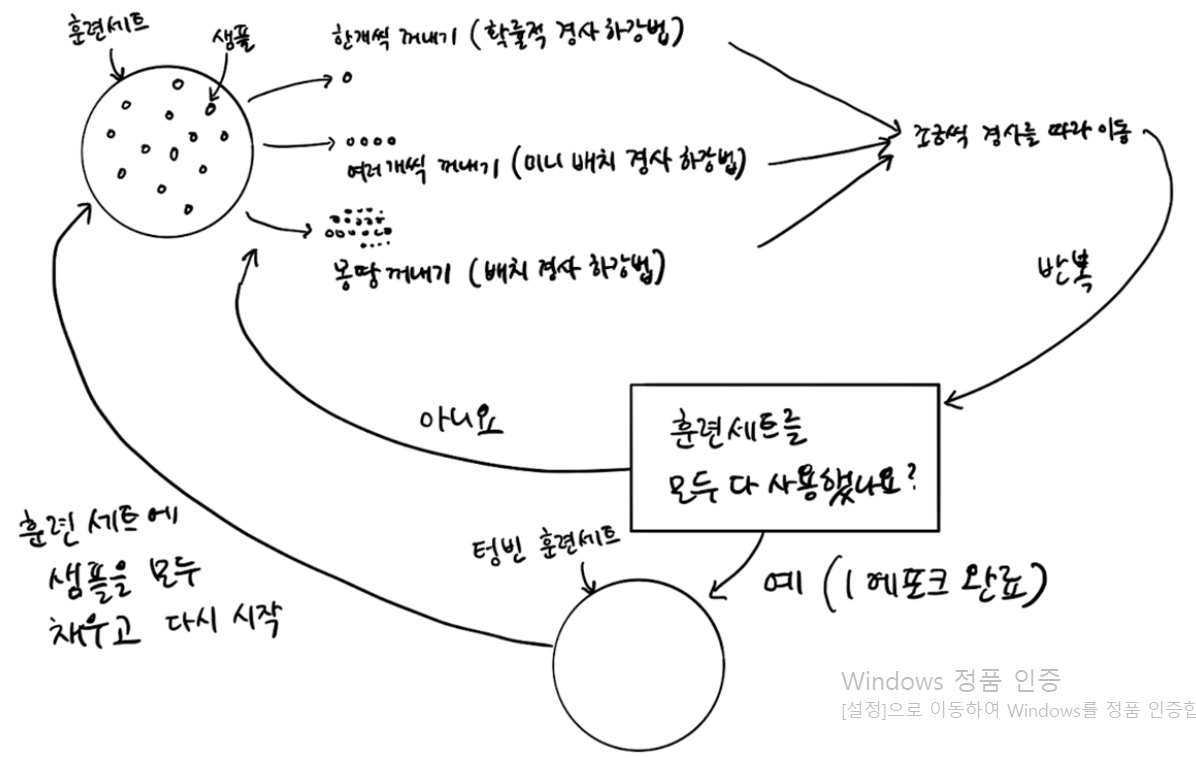

In [ ]:
# 위 방법대로 샘플 1개를 이용하면 너무 무책임하게 내려갈 수 있다.
# 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.

# 이러한 문제점을 해소하려고 무작위로 몇개의 샘플을 선택해서 경사를 내려간다면
    # 미니 배치 경사하강법 : 여러개의 샘플을 사용해서 경사하강 진행
    # 배치 경사하강법 : 극단적으로 모든 샘플을 이용해 경사하강 진행
    #     단점        : 1. 컴퓨터 자원을 너무 많이 사용한다.  2. 한번에 전체 데이터를 모두 읽을 수 없을 수 있다.

# 확률적 경사 하강법은 훈련세트를 사용해 최적의 장소로 조금씩 이동
# 이 때문에 훈련데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 이어갈 수 있다. -> 매일매일 리셋할 필요없다 -> 신경망 알고리즘을 사용한다.

# 손실함수 (Loss function) -> 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준 (작을수록 좋음)
#                          -> 하지만 어떤 값이 최소값인지 알 수 없음
#                          -> 가능한 많이 찾아보고 만족할 만한 수준이면 인정해야함
#                          -> 이 값을 찾아서 조금씩 이동
# 손실함수 공식 : Loss = log(p) -> p : 모델이 '1'이라고 예측한 확률

# 비용함수 (Cost function) -> 훈련세트에 있는 모든 샘플에 대한 손실함수의 합
#                          -> 손실함수 : 샘플 하나에 대한 손실 정의

# 분류에서 손실은 정답을 못 맞히는 것을 의미한다.

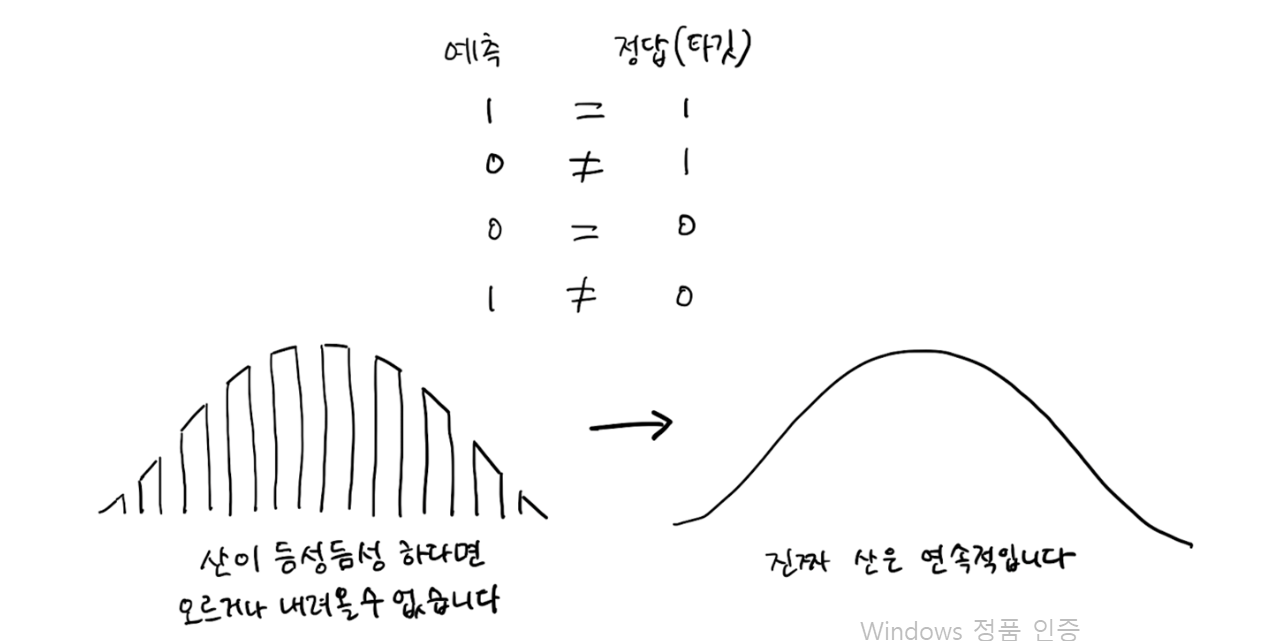

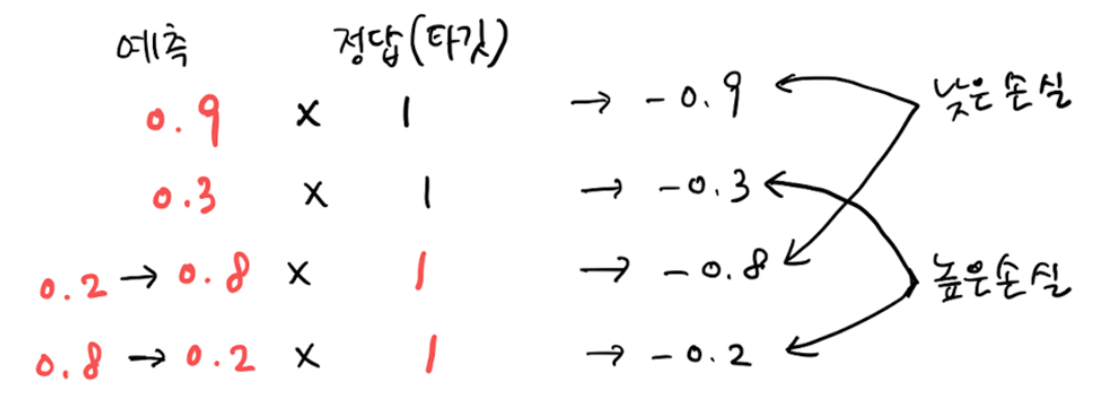

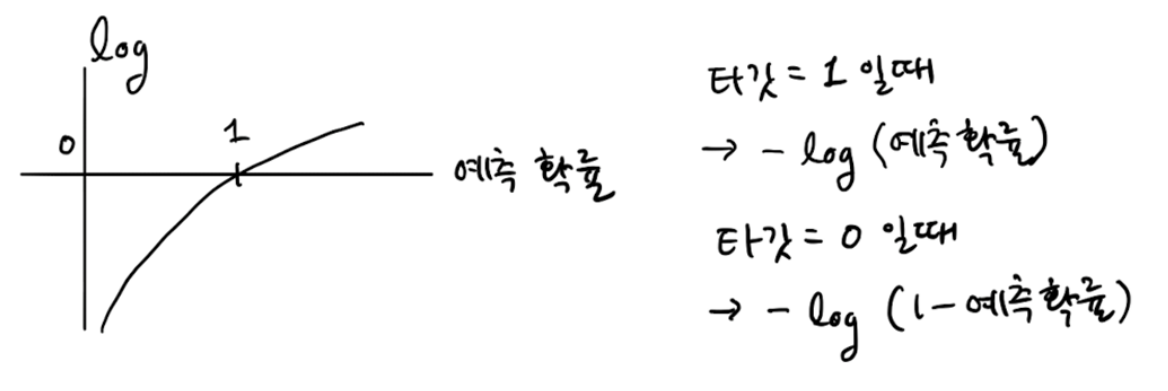

In [ ]:
# 정답이 1 일 때
  # 모델이 높은 확률(0.9  0.8)로 맞추면 -> 손실이 작다.
  # 모델이 낮은 확률(0.3  0.2)로 맞추면 -> 손실이 크다.

# 로그 값은 0~1 사이에서 항상 음수이기 때문에
# log(0.9) = -0.1
# log(0.2) = -1.6
# 그래서 손실은 앞에 마이너스를 붙여 양수로 바꿔준다.

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()   # fish에 있는 리스트 위 5개 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# Species(어종)을 제외한 나머지 필드를 fish_input 변수 리스트에 넣음
fish_target = fish['Species'].to_numpy()      # Species(어종) 정답파일로 생성
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [5]:
from sklearn.model_selection import train_test_split

import numpy as np
np.set_printoptions(precision=6, suppress=True) # 표준점수 변환용
#       precision : 소수점 몇자리까지 출력하는지
#                     suppress=True : 과학적 표기법(지수표기) 사용안함

# 사이킷런을 이용해서 훈련자료와 테스트자료 나누기
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
print('train_input')
print(train_input)

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [6]:
print(train_input.shape)    # 데이터 119개, 특성 5개

(119, 5)


In [7]:
print('test_input')
print(test_input)

test_input
[[  78.       18.7      19.4       5.1992    3.1234]
 [  13.4      12.4      13.5       2.43      1.269 ]
 [ 200.       32.3      34.8       5.568     3.3756]
 [ 270.       26.       28.7       8.3804    4.2476]
 [ 150.       23.       24.5       5.2185    3.626 ]
 [1000.       37.       42.6      18.957     6.603 ]
 [   7.       10.6      11.6       1.7284    1.1484]
 [ 180.       25.2      27.9       7.0866    3.906 ]
 [ 188.       24.6      26.2       6.7334    4.1658]
 [1250.       56.       59.7      10.6863    6.9849]
 [ 650.       33.5      38.7      14.4738    5.7276]
 [1000.       40.       43.5      12.354     6.525 ]
 [ 600.       32.       37.2      15.438     5.58  ]
 [ 150.       20.       22.4       8.8928    3.2928]
 [ 700.       35.       40.5      16.2405    5.589 ]
 [ 920.       38.5      44.1      18.0369    6.3063]
 [1000.       43.5      46.       12.604     8.142 ]
 [ 218.       26.5      28.        7.168     4.144 ]
 [ 225.       24.       25.5       

In [8]:
print(test_input.shape)       # 데이터 : 40개, 특성 5개

(40, 5)


In [9]:
# 정답리스트 보기
print('train_traget : '+train_target)

['train_traget : Bream' 'train_traget : Pike' 'train_traget : Smelt'
 'train_traget : Perch' 'train_traget : Parkki' 'train_traget : Roach'
 'train_traget : Perch' 'train_traget : Bream' 'train_traget : Perch'
 'train_traget : Perch' 'train_traget : Perch' 'train_traget : Bream'
 'train_traget : Perch' 'train_traget : Parkki' 'train_traget : Perch'
 'train_traget : Bream' 'train_traget : Smelt' 'train_traget : Perch'
 'train_traget : Roach' 'train_traget : Bream' 'train_traget : Pike'
 'train_traget : Bream' 'train_traget : Pike' 'train_traget : Perch'
 'train_traget : Parkki' 'train_traget : Bream' 'train_traget : Perch'
 'train_traget : Pike' 'train_traget : Bream' 'train_traget : Perch'
 'train_traget : Parkki' 'train_traget : Roach' 'train_traget : Perch'
 'train_traget : Bream' 'train_traget : Roach' 'train_traget : Perch'
 'train_traget : Bream' 'train_traget : Bream' 'train_traget : Perch'
 'train_traget : Perch' 'train_traget : Roach' 'train_traget : Pike'
 'train_traget : Perc

In [10]:
print(train_target.shape)   # 데이터 119개

(119,)


In [11]:
print('test_target : '+test_target)

['test_target : Perch' 'test_target : Smelt' 'test_target : Pike'
 'test_target : Whitefish' 'test_target : Perch' 'test_target : Bream'
 'test_target : Smelt' 'test_target : Roach' 'test_target : Perch'
 'test_target : Pike' 'test_target : Bream' 'test_target : Whitefish'
 'test_target : Bream' 'test_target : Parkki' 'test_target : Bream'
 'test_target : Bream' 'test_target : Perch' 'test_target : Perch'
 'test_target : Perch' 'test_target : Bream' 'test_target : Smelt'
 'test_target : Bream' 'test_target : Bream' 'test_target : Bream'
 'test_target : Bream' 'test_target : Perch' 'test_target : Perch'
 'test_target : Whitefish' 'test_target : Smelt' 'test_target : Smelt'
 'test_target : Pike' 'test_target : Perch' 'test_target : Perch'
 'test_target : Pike' 'test_target : Bream' 'test_target : Perch'
 'test_target : Roach' 'test_target : Roach' 'test_target : Parkki'
 'test_target : Perch']


In [12]:
print(test_target.shape)      # 데이터 : 40개

(40,)


In [13]:
from sklearn.preprocessing import StandardScaler
# 훈련세트와 테스트세트의 특성을 표준화 전처리하기(표준점수로 처리)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]


In [14]:
print(test_scaled[:5])

[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [19]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier : 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수 지정
# loss = 'log_loss' : 로지스틱 손실 함수 지정
# max_iter = 10 : 10회 에포크 반복 (전체 훈련세트를 10회 반복)
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target) # 학습 시작

print(sc.score(train_scaled, train_target))   # 77.31%
print(sc.score(test_scaled, test_target))     # 77.5%  -> 반복횟수 부족으로 반복횟수 향상 후 다시 훈련 진행

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [20]:
# 확률적 경사 하강법은 점진적 학습이 가능하다
# SGDClassifier 객체를 다시 만들지 않고 훈련할 모델을 sc로 추가하여 훈련할 수 있다
sc.partial_fit(train_scaled, train_target)    # 부분적인(partial) 학습

print(sc.score(train_scaled, train_target))   # 79.83%  -> 정확도가 향상되고 있다
print(sc.score(test_scaled, test_target))     # 77.5%
# 퍼센트가 증가함 -> 무작정 부분적인 학습을 계속하는 것은 의미가 없음 -> 기준점을 제공해야함
# 현재는 등산 내려오다가 정지된 느낌

0.7983193277310925
0.775


In [ ]:
# 에포크와 과대/과소적합

# 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소, 과대 적합이 될 수 있다.
# 에포크 횟수가 적으면 훈련세트를 덜 학습한다.
# 에포크 횟수가 충분히 많다면 훈련세트를 완전히 학습할 것이다.

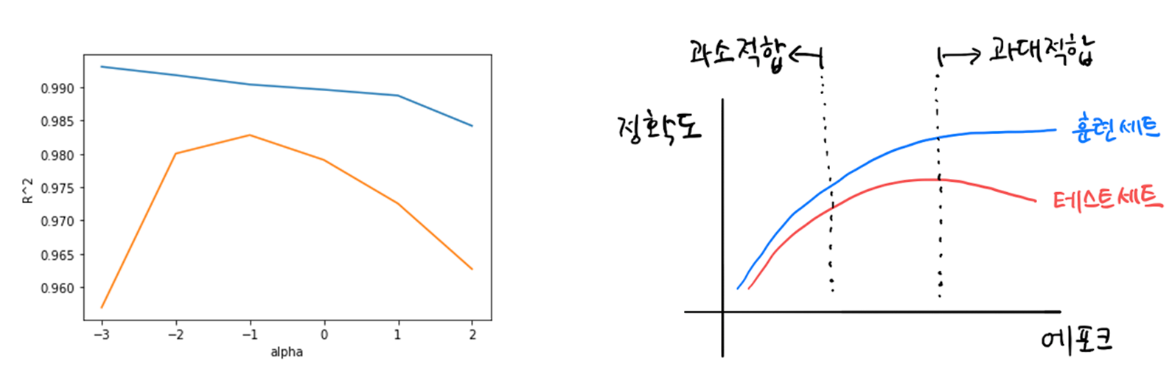

In [ ]:
# 바꾸어 말하면 적은 에포크 횟수 동안에 훈련된 모델은 훈련세트와 테스트세트에 적합하지 않음 (과소적합)
# 반대로 많은 에포크 횟수 동안에 훈련된 모델은 확률이 너무 높아 훈련세트와 테스트세트에 적합하지 않음 (과대적합)

# 과대 적합이 되기전에 훈련을 멈추는 것을 조기 종료라고 한다.

In [21]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = [] # 훈련세트 점수를 누적하는 빈 리스트
test_score = [] # 테스트세트 점수를 누적하는 빈 리스트

# train_target에 있는 7개의 데이터 제공
classes = np.unique(train_target)

for _ in range(0,300):  # 300번의 에포크 동안 훈련 진행        # _ : 파이썬에서 1회용 변수로 사용
  sc.partial_fit(train_scaled, train_target, classes=classes)  # 훈련을 부분적으로 추가

  # 반복할 때 마다 훈련세트와 테스트세트의 점수를 계산하여 train_score와 test_score 리스트에 추가
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

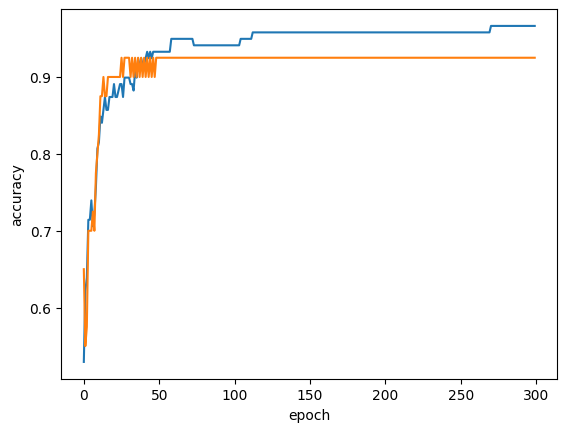

In [22]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')     # 에포크 횟수
plt.ylabel('accuracy')  # 정확도
plt.show()

In [23]:
# 결론 : 에포크 횟수를 100번 정도 돌리니 차트상으로 과대,과소적합이 아니다.

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
# 확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춤
#                                         tol = None : 조기종료 안함

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))   # 95.79%
print(sc.score(test_scaled, test_target))     # 92.5%     최적의 상태로 분석

0.957983193277311
0.925


In [24]:
sc.predict(test_scaled[:5])   #Perch Smelt Pike Perch Perch

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)   # decimals : 소수점 몇자리까지인지

# Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'
# array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
#        [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
#        [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
#        [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
#        [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [25]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [ ]:
# 손실함수에 대한 loss 매개변수

# loss 매개값의 기본값은 loss=hinge (힌지 손실) -> 서포트 백터 머신(SVM)이라 부름
# SVM : 두 클래스를 가장 멀린 떨어지게 나누는 경계를 찾는 알고리즘
# 데이터를 선 하나로 나눈다고 가정할 때, 여러 개의 선을 그릴 수 있다.
# SVM은 이 중 두 클래스 사이의 간격(마진)이 가장 넓은 선을 고른다.

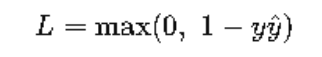

In [26]:
# loss = 'hinge'는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.
# hinge 손실은 단순히 맞추는게 아니라 결정 경계에서 충분히 멀리 떨어져 맞추길 원한다.
# 힌지 손실은 "가장 안전하게 나누는 선"을 찾는 알고리즘

sc_hinge = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc_hinge.fit(train_scaled, train_target)

print(sc_hinge.score(train_scaled, train_target))
print(sc_hinge.score(test_scaled, test_target))

0.9495798319327731
0.925


In [27]:
sc_hinge.predict(test_scaled[:5])
# 단 힌지 손실함수는 predict_proba()를 지원하지 않음
# proba = sc_hinge.predict_proba(test_scaled[:5])
# np.round(proba, decimals=3)

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype='<U9')

In [28]:
sc_hinge.partial_fit(train_scaled, train_target)
print(sc_hinge.score(train_scaled, train_target))
print(sc_hinge.score(test_scaled, test_target))

0.907563025210084
0.925


In [30]:
from sklearn.metrics import hinge_loss

train_score = []
test_score = []
train_loss = []
test_loss = []

classes = np.unique(train_target)

sc_hinge_test = SGDClassifier(loss='hinge',max_iter=1, tol=None, random_state=42)

for _ in range(300):
  sc_hinge_test.partial_fit(train_scaled, train_target, classes=classes)

  # accuracy (정확도)
  train_score.append(sc_hinge_test.score(train_scaled, train_target))
  test_score.append(sc_hinge_test.score(test_scaled, test_target))

  # loss (손실값)
  train_decision = sc_hinge_test.decision_function(train_scaled)
  test_decision = sc_hinge_test.decision_function(test_scaled)

  train_loss.append(hinge_loss(train_target, train_decision))
  test_loss.append(hinge_loss(test_target, test_decision))

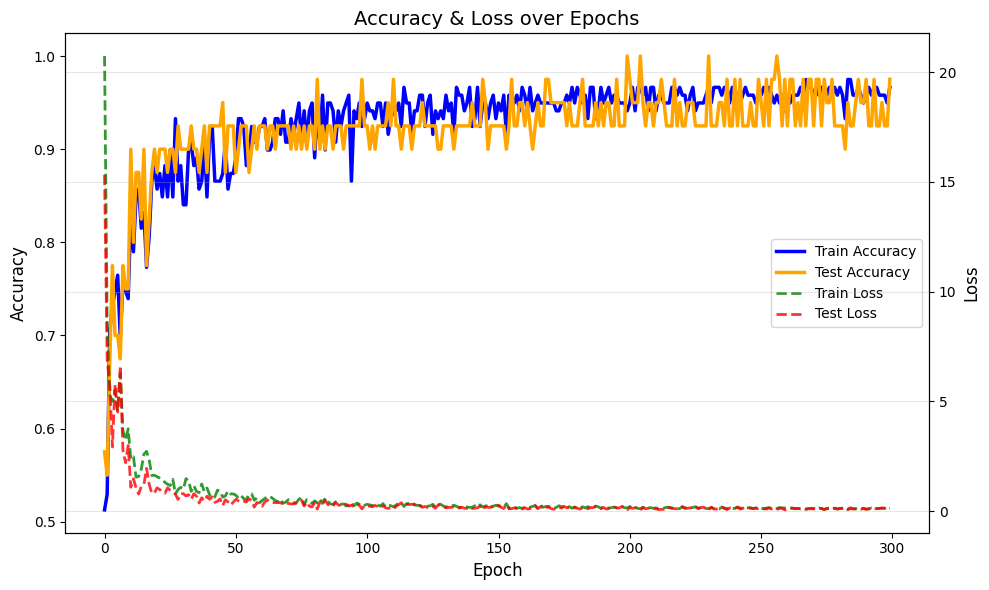

In [33]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Accuracy (왼쪽 축)
ax1.plot(train_score, color='blue', linewidth=2.5, label='Train Accuracy')
ax1.plot(test_score, color='orange', linewidth=2.5, label='Test Accuracy')

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.tick_params(axis='y')

# Loss (오른쪽 축)
ax2 = ax1.twinx()

ax2.plot(train_loss, color='green', linestyle='--', linewidth=2, alpha=0.8, label='Train Loss')
ax2.plot(test_loss, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Test Loss')

ax2.set_ylabel('Loss', fontsize=12)

# 범례 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1+labels2, loc='center right')

plt.title('Accuracy & Loss over Epochs', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 조기종료 지점 찾아보기 (Early Stopping)
# test loss가 가장 낮은 epoch 또는 test loss가 patience 횟수만큼 연속 증가하면 멈춤
# minL(test) : test loss가 더 이상 감소하지 않는 시점을 찾는다.

In [36]:
patience = 10
best_loss = float('inf')
patience_counter = 0
early_stop_epoch = 0

train_score_early = []
test_score_early = []
train_loss_early = []
test_loss_early = []

sc_hinge_test_early = SGDClassifier(loss='hinge',max_iter=1,tol=None,random_state=42)

for epoch in range(300):
  sc_hinge_test_early.partial_fit(train_scaled, train_target, classes=classes)

  # accuracy 저장
  train_score_early.append(sc_hinge_test_early.score(train_scaled, train_target))
  test_score_early.append(sc_hinge_test_early.score(test_scaled, test_target))

  # loss 계산
  train_decision_early = sc_hinge_test_early.decision_function(train_scaled)
  test_decision_early = sc_hinge_test_early.decision_function(test_scaled)

  current_test_loss = hinge_loss(test_target, test_decision_early)
  train_loss_early.append(hinge_loss(train_target, train_decision_early))
  test_loss_early.append(current_test_loss)

  # Early Stopping 체크
  if current_test_loss < best_loss:
    best_loss = current_test_loss
    patience_counter = 0
    early_stop_epoch = epoch
  else:
    patience_counter += 1

  if patience_counter >= patience:
    print(f"Early stopping at epoch {epoch}")
    break

Early stopping at epoch 23


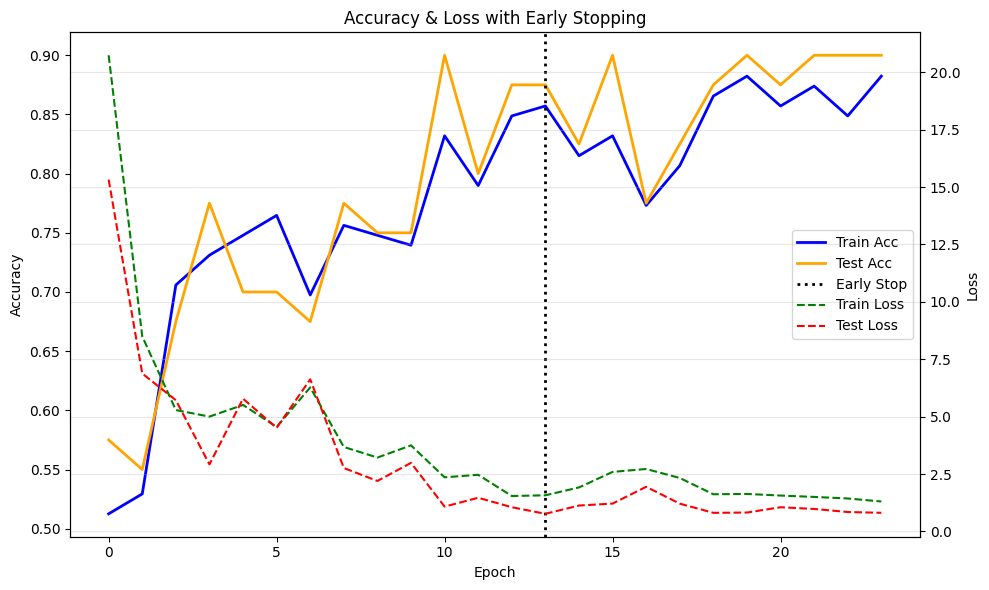

In [39]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Accuracy
ax1.plot(train_score_early, color='blue', linewidth=2, label='Train Acc')
ax1.plot(test_score_early, color='orange', linewidth=2, label='Test Acc')

# Early stopping 세로선
ax1.axvline(x=early_stop_epoch, color='black', linestyle=':', linewidth=2, label='Early Stop')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

# Loss
ax2 = ax1.twinx()
ax2.plot(train_loss_early, color='green', linestyle='--', label='Train Loss')
ax2.plot(test_loss_early, color='red', linestyle='--', label='Test Loss')
ax2.set_ylabel('Loss')

# 범례 통합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc='center right')

plt.title('Accuracy & Loss with Early Stopping')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()